In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('latency_results.csv')

In [7]:
import copy
df_bk = copy.deepcopy(df)

In [15]:
df[['memory_type', 'frequency', 'chip_width']] = df_bk['config'].str.split('_', n=2, expand=True)
df['chip_width'] = df['chip_width'].str.extract(r'(x4|x8|x16)')
df.fillna(0)

,config,trace,memory_access_cycles_recorded_core_0,cycles_recorded_core_0,llc_mshr_unavailable,llc_read_misses,llc_read_access,llc_write_misses,llc_write_access,llc_eviction,...,read_queue_len_0,write_row_hits_0,read_row_hits_core_0,read_row_misses_core_0,num_read_reqs_0,total_rfm_cycles_rank1,total_rfm_cycles_rank0,memory_type,frequency,chip_width
0,DDR4_3200W_x16_cfg.yaml,600,70324.0,4535405.0,492.0,8476.0,2452420.0,558.0,1518370.0,0.0,...,166615.0,0.0,2251.0,518.0,3487.0,0.0,0.0,DDR4,3200W,x16
1,DDR4_3200W_x16_cfg.yaml,602,3333174.0,9307591.0,97.0,1199064.0,2802936.0,1566.0,52147.0,181510.0,...,6172587.0,179.0,188828.0,5033.0,197891.0,0.0,0.0,DDR4,3200W,x16
2,DDR4_3200W_x16_cfg.yaml,605,1712951.0,7833178.0,186636.0,488685.0,2928156.0,2166.0,779392.0,129090.0,...,10348034.0,8.0,84127.0,4140.0,145474.0,0.0,0.0,DDR4,3200W,x16
3,DDR4_3200W_x16_cfg.yaml,625,863489.0,6330268.0,2051.0,75995.0,2646974.0,13044.0,1328066.0,21573.0,...,2450253.0,73.0,24430.0,2492.0,37957.0,0.0,0.0,DDR4,3200W,x16
4,DDR4_3200W_x16_cfg.yaml,631,287852.0,4644336.0,0.0,14753.0,2446877.0,11456.0,1180453.0,4.0,...,323037.0,0.0,1801.0,1677.0,5531.0,0.0,0.0,DDR4,3200W,x16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,DDR4_2933V_x4_cfg.yaml,628,1081653.0,7978107.0,25704.0,216043.0,2882941.0,37596.0,2677092.0,54746.0,...,4368646.0,552.0,58465.0,2961.0,71130.0,0.0,0.0,DDR4,2933V,x4
224,DDR4_2933V_x4_cfg.yaml,638,153407.0,4678227.0,307.0,10548.0,2671773.0,261.0,1106105.0,0.0,...,144205.0,0.0,1847.0,840.0,2705.0,0.0,0.0,DDR4,2933V,x4
225,DDR4_2933V_x4_cfg.yaml,644,376864.0,5008029.0,0.0,28348.0,2889827.0,24.0,256393.0,0.0,...,393362.0,0.0,9950.0,629.0,10722.0,0.0,0.0,DDR4,2933V,x4
226,DDR4_2933V_x4_cfg.yaml,649,14143.0,4367692.0,0.0,556.0,2446933.0,185.0,1544168.0,0.0,...,18885.0,0.0,144.0,93.0,284.0,0.0,0.0,DDR4,2933V,x4


In [22]:
df_x4 = df[df['chip_width']=='x4']

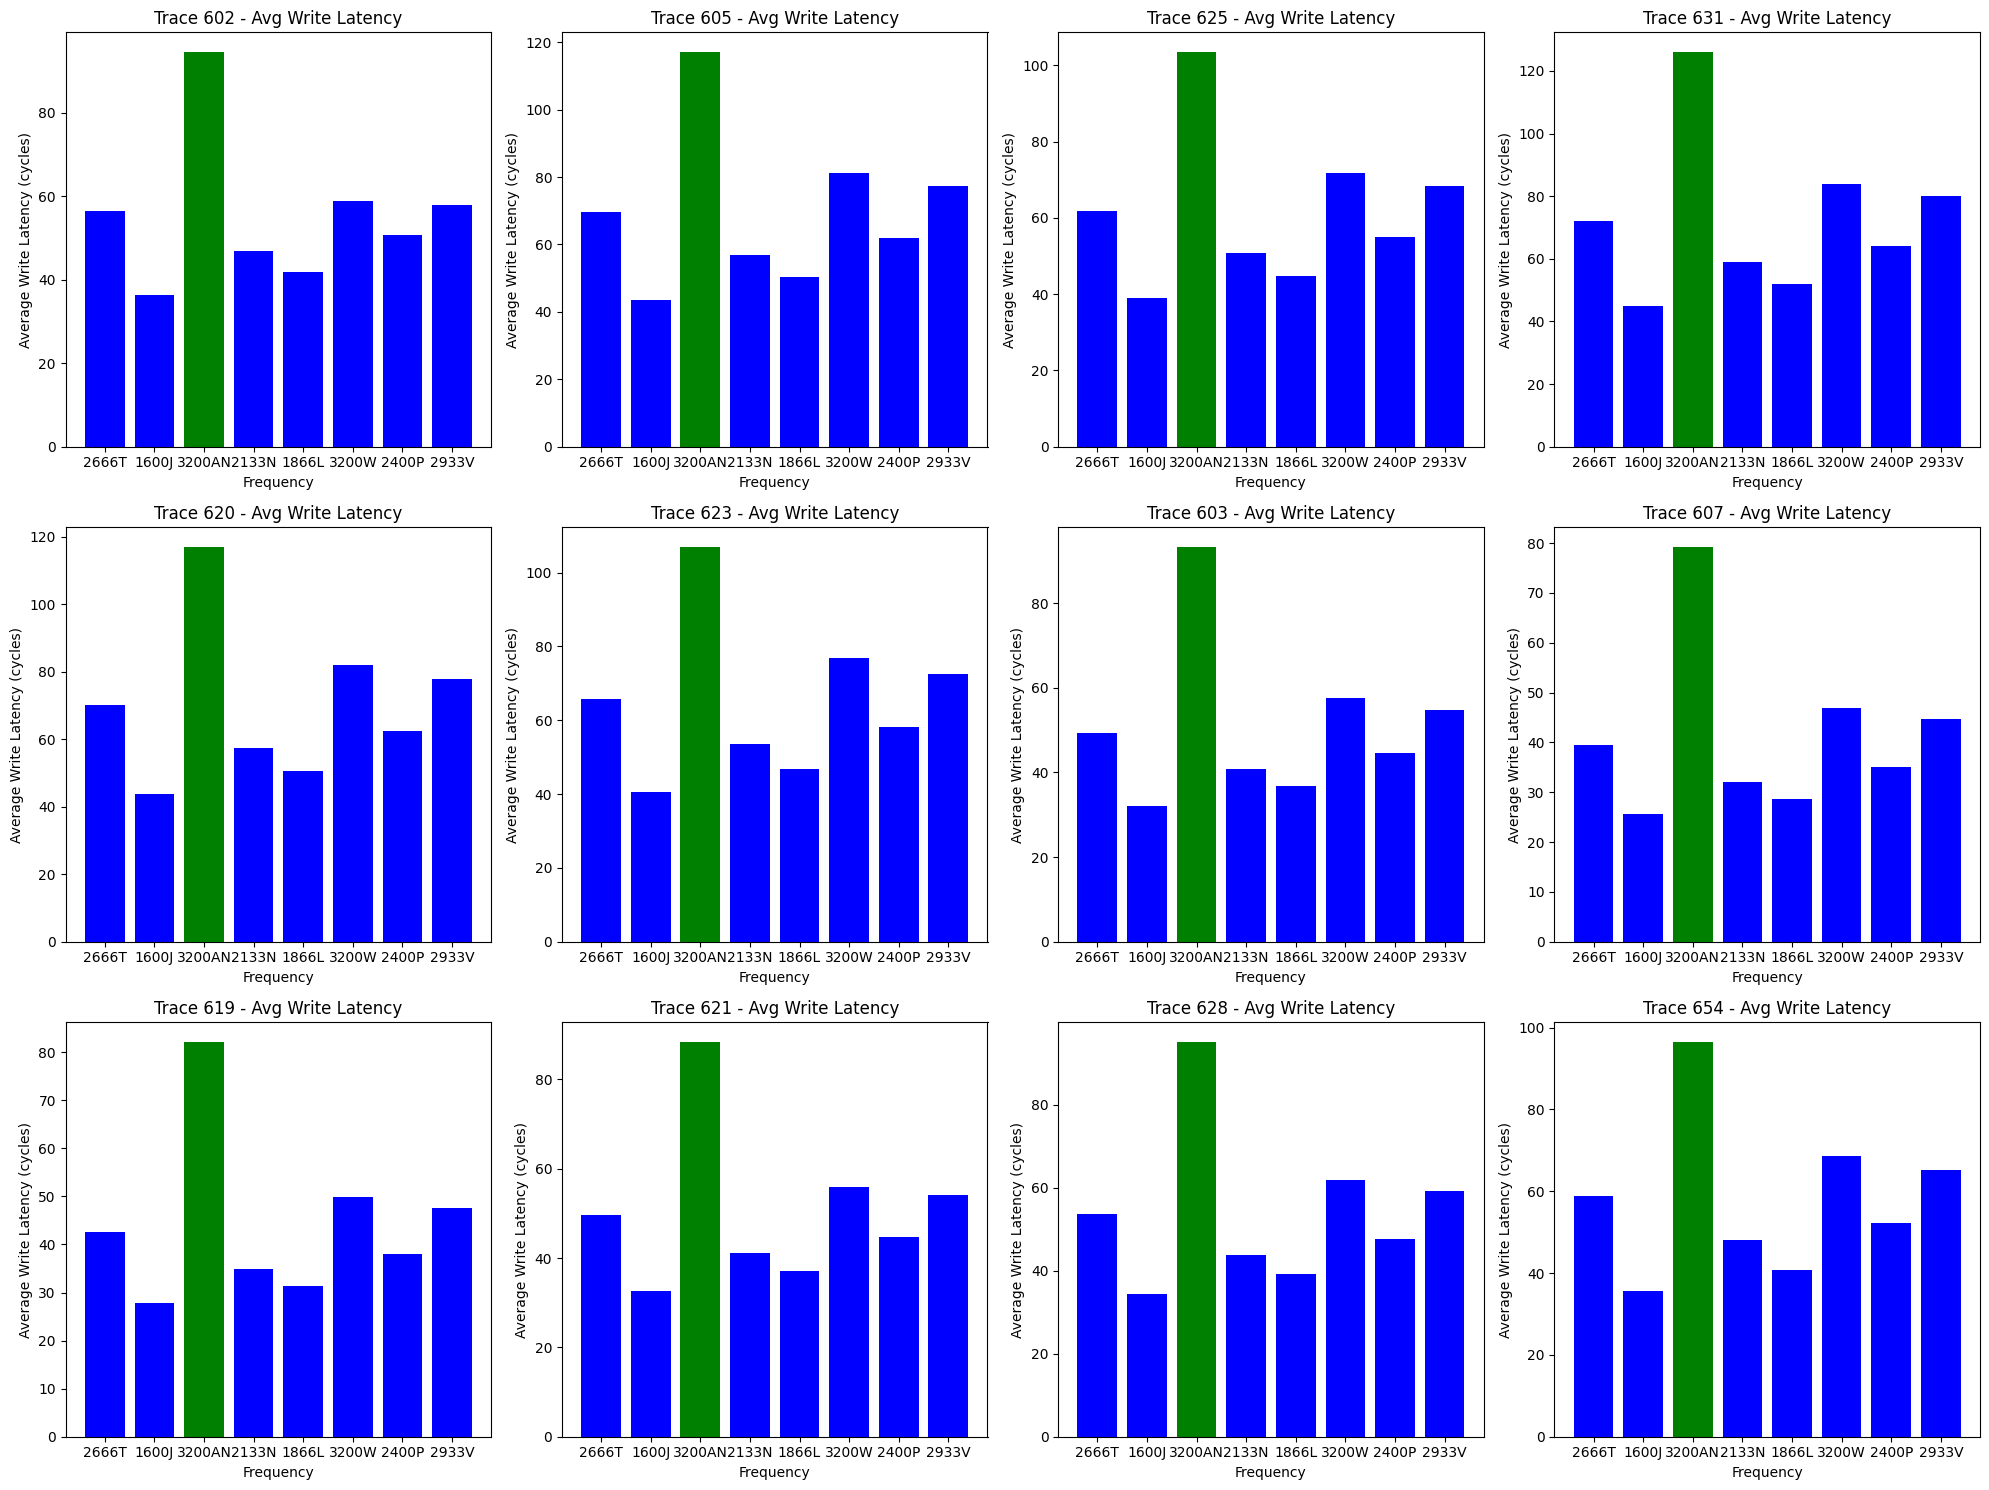

In [30]:
import matplotlib.pyplot as plt
import math

# 过滤出 '内存宽度' 为 'x4' 的数据
df_x4 = df[df['chip_width'] == 'x4']

# 只选择 'avg_write_latency' 相关的列
write_latency_column = 'avg_write_latency_0'

# 过滤掉所有 'avg_write_latency_0' 全为 0 的 trace
df_x4_filtered = df_x4.groupby('trace').filter(lambda x: x[write_latency_column].sum() > 0)

# 获取所有剩余 trace 值的数量
unique_traces = df_x4_filtered['trace'].unique()
num_traces = len(unique_traces)

# 计算子图的行和列数量，使其接近正方形
cols = math.ceil(math.sqrt(num_traces))
rows = math.ceil(num_traces / cols)

# 创建总的子图布局，确保是接近正方形的
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))

# 如果只有一个子图，axes 不是数组，因此将其转化为数组
axes = axes.flatten() if num_traces > 1 else [axes]

# 为每个 trace 绘制子图
for i, trace_value in enumerate(unique_traces):
    df_trace = df_x4_filtered[df_x4_filtered['trace'] == trace_value]
    
    # 绘制柱状图，x轴为 frequency，根据 memory_type 选择颜色
    colors = df_trace['memory_type'].apply(lambda x: 'blue' if x == 'DDR4' else 'green')
    axes[i].bar(df_trace['frequency'], df_trace[write_latency_column], color=colors)
    
    # 设置子图标题和标签
    axes[i].set_title(f'Trace {trace_value} - Avg Write Latency')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Average Write Latency (cycles)')

# 隐藏未使用的子图（如果有）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 调整布局，使图表适应窗口大小
plt.tight_layout()
plt.show()


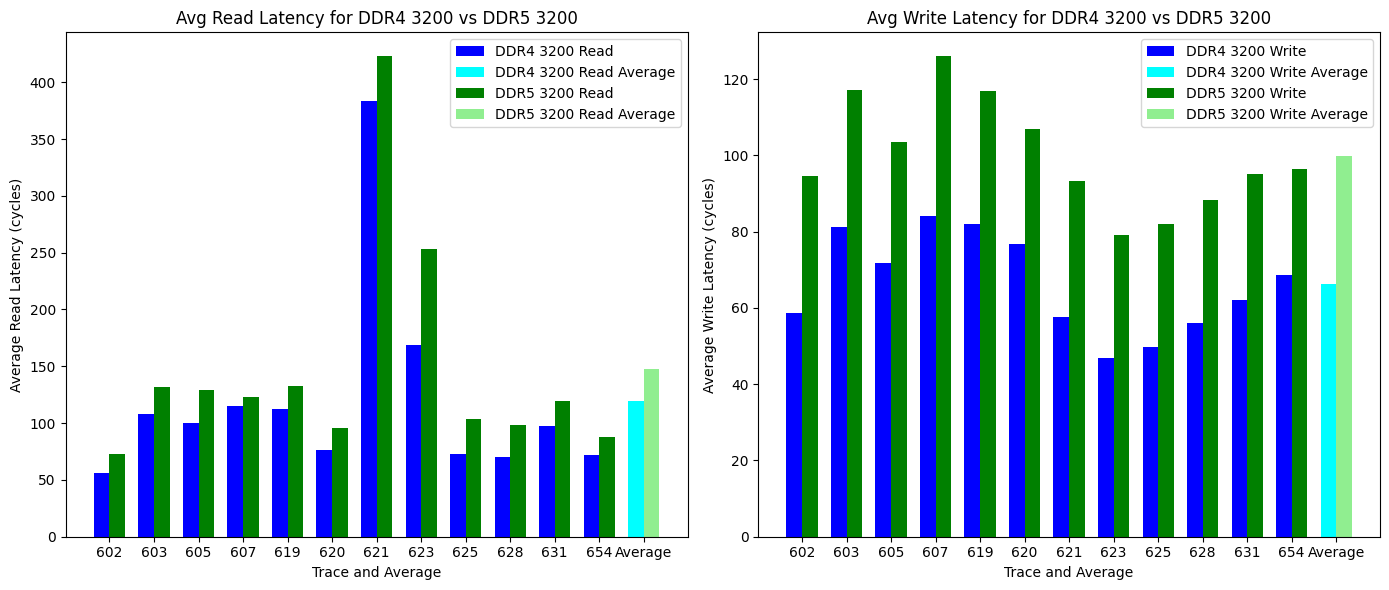

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 过滤出 '内存宽度' 为 'x4' 的数据，并且只选择 DDR4 3200 和 DDR5 3200 的频率
df_filtered = df[(df['chip_width'] == 'x4') & (df['frequency'].isin(['3200AN', '3200W']))]

# 分别过滤出 DDR4 3200 和 DDR5 3200 的数据，同时去掉 avg_write_latency_0 和 avg_read_latency_0 为 0 的行
df_ddr4 = df_filtered[(df_filtered['memory_type'] == 'DDR4') & (df_filtered['avg_write_latency_0'] > 0) & (df_filtered['avg_read_latency_0'] > 0)]
df_ddr5 = df_filtered[(df_filtered['memory_type'] == 'DDR5') & (df_filtered['avg_write_latency_0'] > 0) & (df_filtered['avg_read_latency_0'] > 0)]

# 获取 trace 值列表，确保两者有相同的 x 轴，取交集以确保没有空数据
traces = np.intersect1d(df_ddr4['trace'].unique(), df_ddr5['trace'].unique())

# 过滤掉不在交集中的数据
df_ddr4 = df_ddr4[df_ddr4['trace'].isin(traces)]
df_ddr5 = df_ddr5[df_ddr5['trace'].isin(traces)]

# 计算平均读延迟和写延迟
avg_read_latency_ddr4 = df_ddr4['avg_read_latency_0'].mean()
avg_read_latency_ddr5 = df_ddr5['avg_read_latency_0'].mean()
avg_write_latency_ddr4 = df_ddr4['avg_write_latency_0'].mean()
avg_write_latency_ddr5 = df_ddr5['avg_write_latency_0'].mean()

# 设置柱状图宽度
bar_width = 0.35
index = np.arange(len(traces) + 1)  # 多一个位置用于放平均值

# 创建子图布局
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# 左边子图：绘制 DDR4 和 DDR5 的读延迟，包括 trace 数据和平均值
axes[0].bar(index[:-1], df_ddr4['avg_read_latency_0'], bar_width, label='DDR4 3200 Read', color='blue')
axes[0].bar(index[-1], avg_read_latency_ddr4, bar_width, label='DDR4 3200 Read Average', color='cyan')
axes[0].bar(index[:-1] + bar_width, df_ddr5['avg_read_latency_0'], bar_width, label='DDR5 3200 Read', color='green')
axes[0].bar(index[-1] + bar_width, avg_read_latency_ddr5, bar_width, label='DDR5 3200 Read Average', color='lightgreen')

# 设置左边子图的标题和标签
axes[0].set_xlabel('Trace and Average')
axes[0].set_ylabel('Average Read Latency (cycles)')
axes[0].set_title('Avg Read Latency for DDR4 3200 vs DDR5 3200')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(list(traces) + ['Average'])
axes[0].legend()

# 右边子图：绘制 DDR4 和 DDR5 的写延迟，包括 trace 数据和平均值
axes[1].bar(index[:-1], df_ddr4['avg_write_latency_0'], bar_width, label='DDR4 3200 Write', color='blue')
axes[1].bar(index[-1], avg_write_latency_ddr4, bar_width, label='DDR4 3200 Write Average', color='cyan')
axes[1].bar(index[:-1] + bar_width, df_ddr5['avg_write_latency_0'], bar_width, label='DDR5 3200 Write', color='green')
axes[1].bar(index[-1] + bar_width, avg_write_latency_ddr5, bar_width, label='DDR5 3200 Write Average', color='lightgreen')

# 设置右边子图的标题和标签
axes[1].set_xlabel('Trace and Average')
axes[1].set_ylabel('Average Write Latency (cycles)')
axes[1].set_title('Avg Write Latency for DDR4 3200 vs DDR5 3200')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(list(traces) + ['Average'])
axes[1].legend()

# 调整布局，使两个子图紧凑排列
plt.tight_layout()
plt.show()


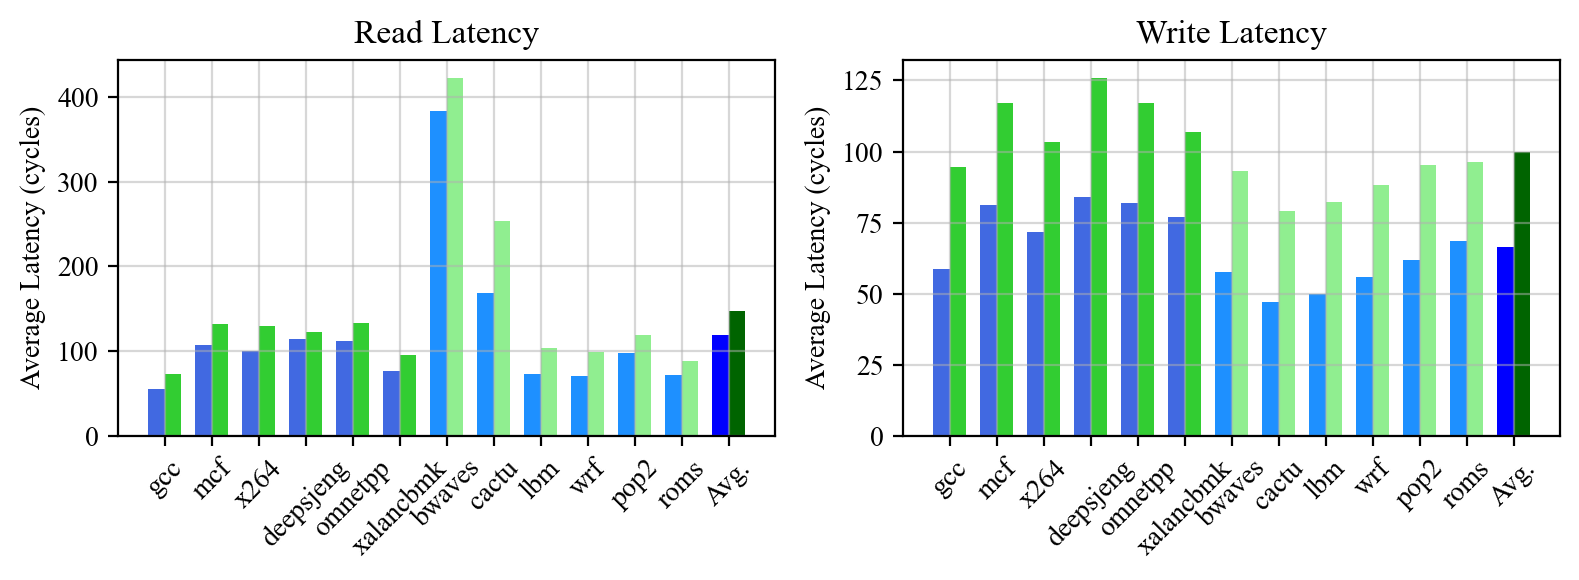

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"

# 过滤出 '内存宽度' 为 'x4' 的数据，并且只选择 DDR4 3200 和 DDR5 3200 的频率
df_filtered = df[(df['chip_width'] == 'x4') & (df['frequency'].isin(['3200AN', '3200W']))]

# 分别过滤出 DDR4 3200 和 DDR5 3200 的数据，同时去掉 avg_write_latency_0 和 avg_read_latency_0 为 0 的行
df_ddr4 = df_filtered[(df_filtered['memory_type'] == 'DDR4') & (df_filtered['avg_write_latency_0'] > 0) & (df_filtered['avg_read_latency_0'] > 0)]
df_ddr5 = df_filtered[(df_filtered['memory_type'] == 'DDR5') & (df_filtered['avg_write_latency_0'] > 0) & (df_filtered['avg_read_latency_0'] > 0)]

# int 和 float 基准的数字部分
int_traces = ['600', '602', '605', '620', '623', '625', '631', '641', '648', '657']
float_traces = ['603', '607', '619', '621', '627', '628', '638', '644', '649', '654']

# 基准测试的映射字典
trace_names = {
    '600': 'perlbench', '602': 'gcc', '605': 'mcf', '620': 'omnetpp', '623': 'xalancbmk',
    '625': 'x264', '631': 'deepsjeng', '641': 'leela', '648': 'exchange2', '657': 'xz',
    '603': 'bwaves', '607': 'cactu', '619': 'lbm', '621': 'wrf', '627': 'cam4',
    '628': 'pop2', '638': 'imagick', '644': 'nab', '649': 'fotonik3d', '654': 'roms'
}

# 按照 trace 的数字部分将基准分成 int 和 float
df_ddr4_int = df_ddr4[df_ddr4['trace'].astype(str).isin(int_traces)]
df_ddr4_float = df_ddr4[df_ddr4['trace'].astype(str).isin(float_traces)]
df_ddr5_int = df_ddr5[df_ddr5['trace'].astype(str).isin(int_traces)]
df_ddr5_float = df_ddr5[df_ddr5['trace'].astype(str).isin(float_traces)]

# 将 trace 映射到指标名称
trace_labels = [trace_names[str(trace)] for trace in df_ddr4_int['trace']] + [trace_names[str(trace)] for trace in df_ddr4_float['trace']] + ['Avg.']

# 计算平均值
avg_read_ddr4 = df_ddr4['avg_read_latency_0'].mean()
avg_read_ddr5 = df_ddr5['avg_read_latency_0'].mean()
avg_write_ddr4 = df_ddr4['avg_write_latency_0'].mean()
avg_write_ddr5 = df_ddr5['avg_write_latency_0'].mean()

# 设置柱状图宽度
bar_width = 0.35

# 设置figure和subplot布局
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

# 构建 x 轴的 index
index_int = np.arange(len(df_ddr4_int))
index_float = np.arange(len(df_ddr4_float)) + len(df_ddr4_int)  # float 部分的 index 要排在 int 部分后面
index_avg = len(df_ddr4_int) + len(df_ddr4_float)  # avg 部分的 index 放在最后
index_combined = np.concatenate((index_int, index_float, [index_avg]))

# 绘制左边的读延迟图
axes[0].bar(index_int, df_ddr4_int['avg_read_latency_0'], bar_width, label='DDR4 3200 Read (int)', color='royalblue')
axes[0].bar(index_float, df_ddr4_float['avg_read_latency_0'], bar_width, label='DDR4 3200 Read (float)', color='dodgerblue')
axes[0].bar([index_avg], avg_read_ddr4, bar_width, label='DDR4 3200 Read (avg)', color='blue')

axes[0].bar(index_int + bar_width, df_ddr5_int['avg_read_latency_0'], bar_width, label='DDR5 3200 Read (int)', color='limegreen')
axes[0].bar(index_float + bar_width, df_ddr5_float['avg_read_latency_0'], bar_width, label='DDR5 3200 Read (float)', color='lightgreen')
axes[0].bar([index_avg + bar_width], avg_read_ddr5, bar_width, label='DDR5 3200 Read (avg)', color='darkgreen')

# 设置左边的读延迟图标题和标签
# axes[0].set_xlabel('Benchmark')
axes[0].set_ylabel('Average Latency (cycles)')
axes[0].set_title('Read Latency')
axes[0].set_xticks(index_combined + bar_width / 2)
axes[0].set_xticklabels(trace_labels, rotation=45)
#axes[0].legend()
axes[0].grid(alpha=0.5)

# 绘制右边的写延迟图
axes[1].bar(index_int, df_ddr4_int['avg_write_latency_0'], bar_width, label='DDR4 3200 Write (int)', color='royalblue')
axes[1].bar(index_float, df_ddr4_float['avg_write_latency_0'], bar_width, label='DDR4 3200 Write (float)', color='dodgerblue')
axes[1].bar([index_avg], avg_write_ddr4, bar_width, label='DDR4 3200 Write (avg)', color='blue')

axes[1].bar(index_int + bar_width, df_ddr5_int['avg_write_latency_0'], bar_width, label='DDR5 3200 Write (int)', color='limegreen')
axes[1].bar(index_float + bar_width, df_ddr5_float['avg_write_latency_0'], bar_width, label='DDR5 3200 Write (float)', color='lightgreen')
axes[1].bar([index_avg + bar_width], avg_write_ddr5, bar_width, label='DDR5 3200 Write (avg)', color='darkgreen')

# 设置右边的写延迟图标题和标签
# axes[1].set_xlabel('Benchmark')
axes[1].set_ylabel('Average Latency (cycles)')
axes[1].set_title('Write Latency')
axes[1].set_xticks(index_combined + bar_width / 2)
axes[1].set_xticklabels(trace_labels, rotation=45)
#axes[1].legend()
axes[1].grid(alpha=0.5)

# 调整布局
plt.tight_layout()
plt.savefig('latency_comp.png')
plt.show()
